<a href="https://colab.research.google.com/github/Yashbhandakkar/Image-encryption-using-chaotic-map/blob/main/image__encryption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Encrption using Chaotic Map

* We are using different chaotic Maps to generate key here
* We wil encrypt the image pixel-wise. For each pixel there will be a unique key and that key will be generated using the constants from chaotic map
* The chaotic map  we are using here is Logistic Map
* Here the key will depend on two variable those are the intial point where to start and the value of r(rate)

 $X_{n} = {r}*X_{n-1}*(1 - X_{n-1})$

 * For chaotic map  we have to take the value of r in certain range
 * the range will we usually between 3.54 to 4
 * But not for all value between the range because there are some value of r where the map will give periodic output and we can't get chaotic map


### Key Generation using Logistic Map

In [ ]:
"""
Defining the function for generation of key using chaotic
map for an encryption process
"""

def Keygeneration(x,r,size):
    key = []

    for i in range(size):

        x = r*x*(1-x) # logistic map
        key.append(int((x*pow(10,16))%256)) # Key values will we between 0 to 255

    return key

print(Keygeneration(0.01,3.95,10))
print(Keygeneration(0.01,3.95,20))
#print(Keygeneration(0.01,3.95,10))

[0, 180, 237, 194, 194, 223, 121, 142, 107, 249]
[0, 180, 237, 194, 194, 223, 121, 142, 107, 249, 80, 68, 168, 40, 55, 118, 138, 146, 151, 223]


### Image Encryption Code

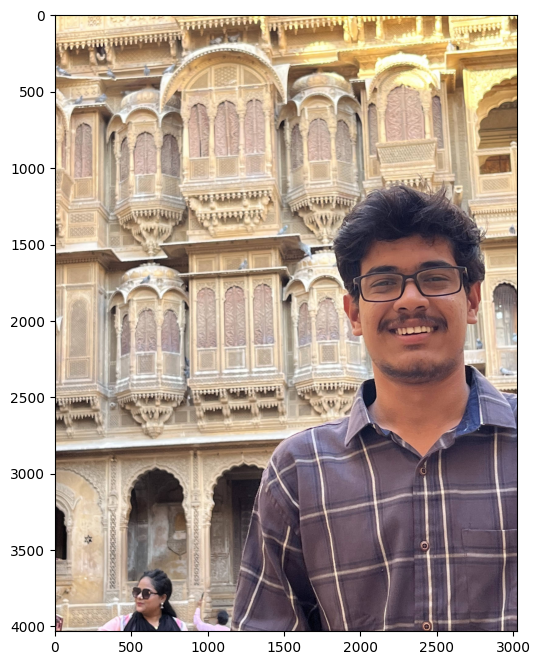

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
# load the image here
# Reading an image
img = mpimg.imread("/content/IMG_8404.jpg")
plt.imshow(img)
plt.show()

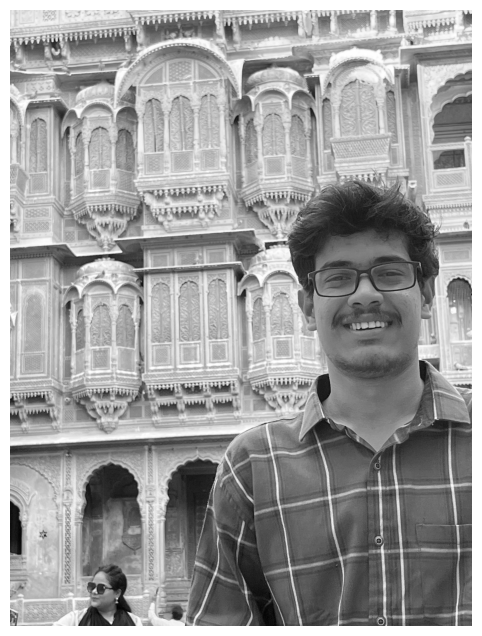

In [ ]:
# converting the image to grey scale
# Because we are talking only about the grey scale image in this code
img_greyscale = np.mean(img, -1); # Convert RGB to grayscale
img = plt.imshow(img_greyscale)
img.set_cmap('gray')
plt.axis('off')
plt.show()


(600, 450)


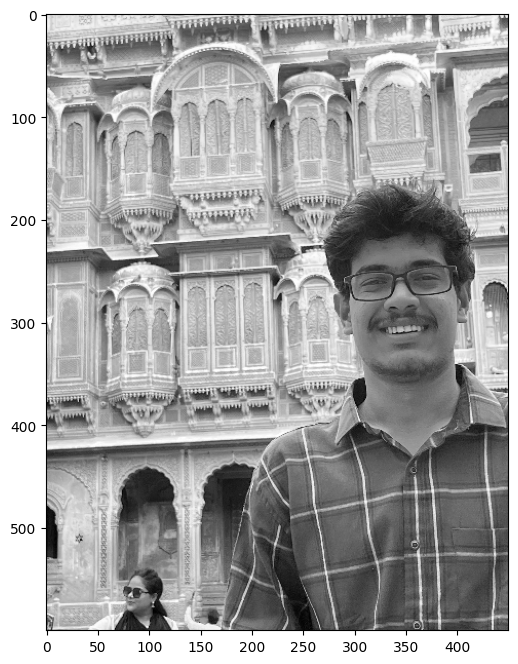

In [ ]:
#Resizeing the image
import cv2
resized_img = cv2.resize(img_greyscale, (450, 600))
print(resized_img.shape)
img = plt.imshow(resized_img)
img.set_cmap('gray')


## main code

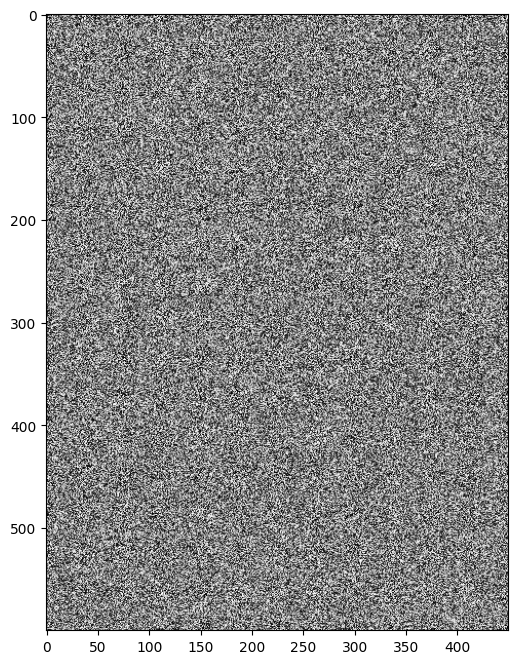

In [ ]:
# Generating Chaotic keys
# There is no inbuilt support for xoring floating point numbers
height = resized_img.shape[0] # 600
width = resized_img.shape[1] # 450
key = Keygeneration(0.01,3.95,height*width)
# key gave us the required keys for encryption

# Encryption
z = 0
enimg = np.zeros(shape=[height,width], dtype=np.uint8)
for i in range(height):
    for j in range(width):
        # pixel values are XORed with key
        enimg[i,j] = int(resized_img[i,j])^key[z]
        z = z + 1


Eimg = plt.imshow(enimg[:,:])
Eimg.set_cmap('gray')
#plt.imshow(enimg[:,:,0])
plt.show()



(600, 450)


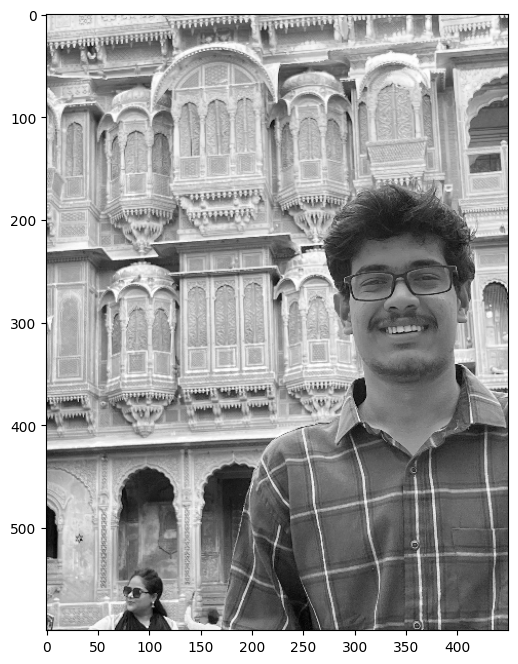

In [ ]:
# Decryption of image
z = 0
decimg = np.zeros(shape=[height,width], dtype = np.uint8)
for i in range(height):
    for j in range(width):
        # pixel values are XORed with key
        decimg[i,j] = enimg[i,j]^key[z]
        z = z + 1

print(decimg.shape)
Dimg = plt.imshow(decimg[:,:])
Dimg.set_cmap('gray')
#plt.imshow(decimg)
plt.show()

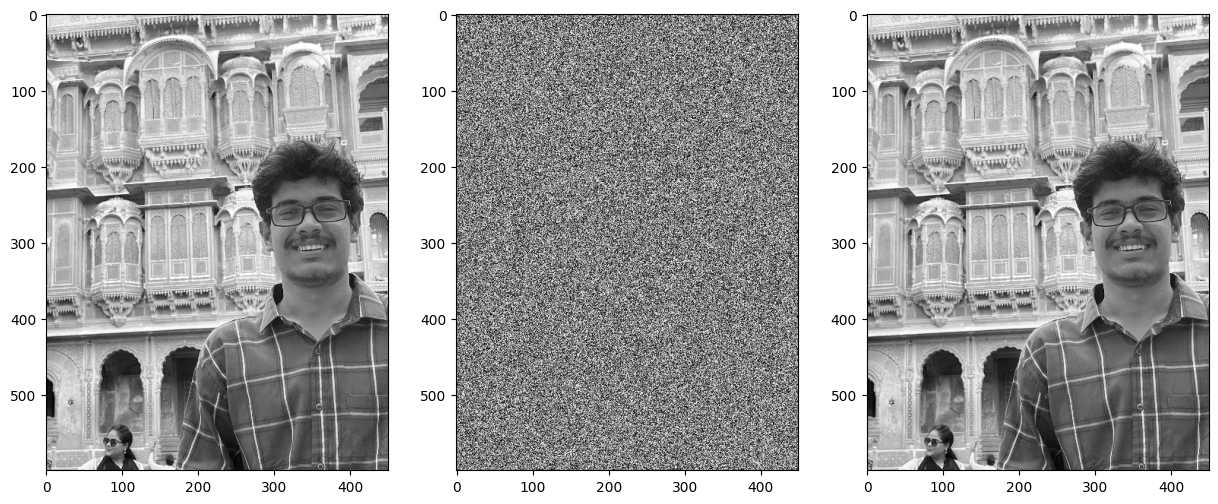

In [ ]:
images = [resized_img,enimg[:,:],decimg[:,:]]

fig, axs = plt.subplots(1, 3, figsize=(15, 15))
for i in range(3):
  k = axs[i].imshow(images[i])
  k.set_cmap('gray')


plt.show()



---



---
# Image Encryption Using Chaotic Map
* Here also we are using the same thing but instead of logistic map we are using lorez map and the same thing will be proceed as previously done





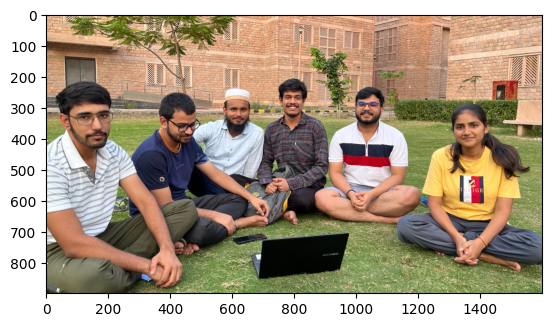

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Reading an image
img = mpimg.imread("/content/WhatsApp Image 2023-11-06 at 1.33.26 PM.jpeg")
plt.imshow(img)
plt.show()

(450, 600, 3)


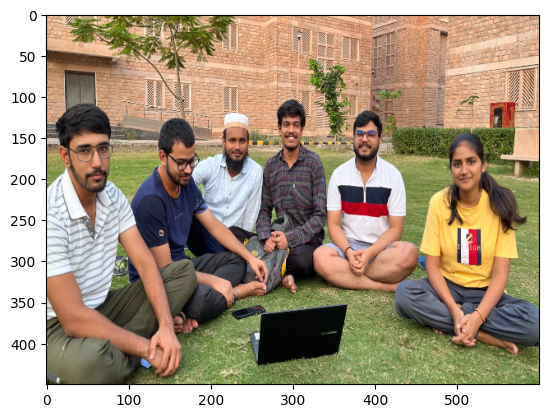

In [ ]:
#Resizeing the image
import cv2
resized_img = cv2.resize(img, (600, 450))
print(resized_img.shape)
img = plt.imshow(resized_img)


In [ ]:
"""
Defining the function for generation of key using chaotic
map for an encryption process
"""
def lorenz_ode(x,y,z,s,r,b):
  xdot=s*(y-x)
  ydot=r*x - y - x*z
  zdot= x*y - b*z
  return xdot,ydot,zdot


def Keygeneration(s,r,b,steps):

    xs=np.empty(steps+1)
    ys=np.empty(steps+1)
    zs=np.empty(steps+1)
    normalized=np.empty(steps+1)

    xs[0]=0
    ys[0]=1
    zs[0]=0


    dt=0.01

    for i in range(steps):
      x_dot,y_dot,z_dot=lorenz_ode(xs[i],ys[i],zs[i],s,r,b)
      xs[i+1]=xs[i]+ (x_dot* dt)
      ys[i+1]=ys[i]+ (y_dot* dt)
      zs[i+1]=zs[i]+ (z_dot* dt)
    #print(xs.shape)

    m=np.min(xs)
    n=np.max(xs)
    x_normalized=abs((zs-m)/(m-n))
    m=np.min(ys)
    n=np.max(ys)
    y_normalized=abs((zs-m)/(m-n))
    m=np.min(zs)
    n=np.max(zs)
    z_normalized=abs((zs-m)/(m-n))

    numbers_x = (x_normalized*pow(10,16))%256
    key_x = [int(x) for x in numbers_x]

    numbers_y = (y_normalized*pow(10,16))%256
    key_y = [int(y) for y in numbers_y]

    numbers_z = (z_normalized*pow(10,16))%256
    key_z = [int(z) for z in numbers_z]
    """
    print(key_x)
    print(key_y)
    print(key_z)
    """

    return key_x,key_y,key_z

"""
s=10
r=28
b=2.667
key_x,key_y,key_z = Keygeneration(s,r,b,500)
print(key_x)
print(key_y)
print(key_z)
print(key_x[0])
"""


'\ns=10\nr=28\nb=2.667\nkey_x,key_y,key_z = Keygeneration(s,r,b,500)\nprint(key_x)\nprint(key_y)\nprint(key_z)\nprint(key_x[0])\n'

In [ ]:
# Generating Chaotic keys
# There is no inbuilt support for xoring floating point numbers
height = resized_img.shape[0] # 600
width = resized_img.shape[1] # 450
k = resized_img.shape[2]
s=12 # 10
r=25 # 28
b=3.66 # 2.667
key_x,key_y,key_z = Keygeneration(s,r,b,height*width)
#print(key_x)
# key gave us the required keys for encryption

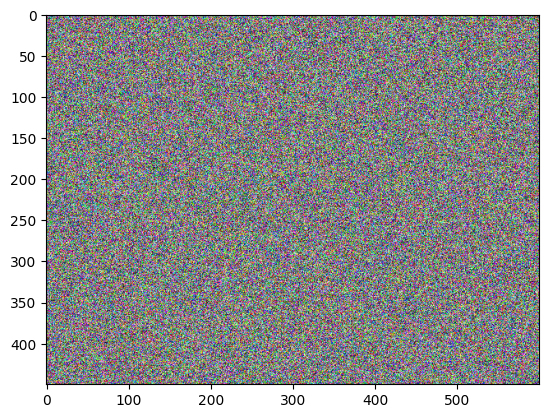

In [ ]:
# # Encryption
from numpy import savetxt

z = 0
enimg = np.zeros(shape=[height,width,3], dtype=np.uint8)
for i in range(height):
    for j in range(width):
        # pixel values are XORed with key
        enimg[i,j,0] = int(resized_img[i,j,0])^key_x[z]
        z = z + 1

z = 0
for i in range(height):
    for j in range(width):
        # pixel values are XORed with key
        enimg[i,j,1] = int(resized_img[i,j,1])^key_y[z]
        z = z + 1

z = 0
for i in range(height):
    for j in range(width):
        # pixel values are XORed with key
        enimg[i,j][2] = int(resized_img[i,j][2])^key_z[z]
        z = z + 1

Eimg = plt.imshow(enimg[:,:,:])

#plt.imshow(enimg[:,:,0])
plt.show()




(450, 600, 3)


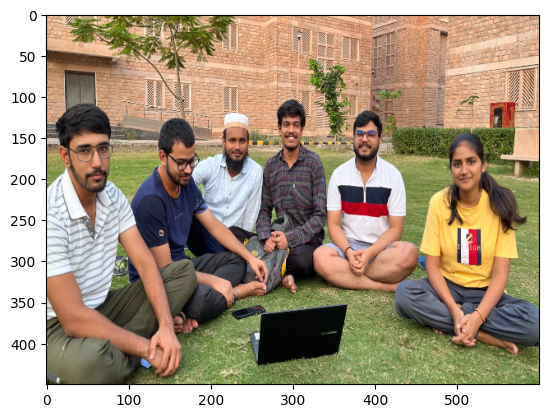

In [ ]:
# Decryption of image

# first generate the key
"""
s=10
r=28
b=2.667
"""
s=12 # 10
r=25 # 28
b=3.66 # 2.667
key_x,key_y,key_z = Keygeneration(s,r,b,height*width)

decimg = np.zeros(shape=[height,width,3], dtype = np.uint8)


z = 0
for i in range(height):
    for j in range(width):
        # pixel values are XORed with key
        decimg[i,j,0] = enimg[i,j,0]^key_x[z]
        z = z + 1

z = 0
for i in range(height):
    for j in range(width):
        # pixel values are XORed with key
        decimg[i,j,1] = enimg[i,j,1]^key_y[z]
        z = z + 1

z = 0
for i in range(height):
    for j in range(width):
        # pixel values are XORed with key
        decimg[i,j,2] = enimg[i,j,2]^key_z[z]
        z = z + 1


print(decimg.shape)
Dimg = plt.imshow(decimg[:,:])
#plt.imshow(decimg)
plt.show()

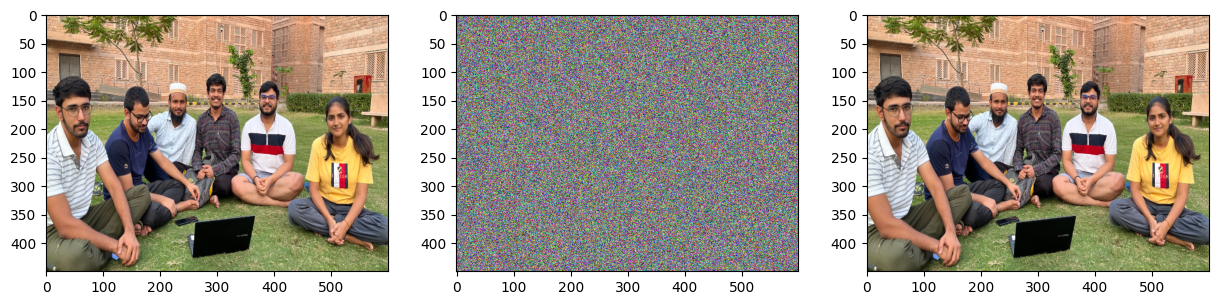

In [ ]:
images = [resized_img,enimg[:,:],decimg[:,:]]

fig, axs = plt.subplots(1, 3, figsize=(15, 15))
for i in range(3):
  k = axs[i].imshow(images[i])



plt.show()